# Natural Language Processing (NLP)
in this tutorial we will go through:
1. what is Natural Language Processing?
2. work throgh a NLP project
3. conclusion

## What is NLP?



Natural Laguage processing main gaol is finding meaningfull information from text.

**Natural Language**: is the language as it is spoken or written normaly (Does not need to be gramerly correct or spilled correctly).\
**Processing**: computation a computer does to analyse text.

**Applications of NLP:**
- machine translation.
- spam detector.
- virtual assistance (like Siri).
- Sentiment Analysis.

## our Project: Comedians
Any data scince (ml project) project go thruogh the same teps.
1. defining a goal (Question to answer)
2. collecting the data.
3. cleaning the data.
4. exploratory data analysis.
5. modeling 


### the goal
Our goal is to look at transcripts of various comedians and note their similarities and differences.

### The data:
- the data set that we will work with was scaped from [Scraps From The Loft](http://scrapsfromtheloft.com)
- the data set contains specials with greater than a 7.5/10 rating in IMDB and more than 2000 votes.

### Data Cleaning
with numerical data, data cleaning is dealing with missing values, duplycated values and so on.\
on the other hand, with text data data cleaning usualy involves:
* Convert all text to lower case
* Remove punctuations (',".?!:;...)
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text (broke down the text into smaller pieces)
* Remove stop words (a, an, at, on ...)

In [2]:
import numpy as np
import pandas as pd

# will be used in data cleaning.
import re
import string

In [3]:
pd.set_option('max_colwidth',150)
data = pd.read_csv("data.csv", index_col=0)
data

,transcript
Ali Wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
Anthony Jeselnik,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
Bill Burr,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
Bo Burnham,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
Dave Chappelle,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
Hasan Minhaj,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
Jim Jefferies,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
Joe Rogan,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
John Mulaney,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
Louis C.K.,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [4]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()  # cinvert text to lowercas
    text = re.sub('\[.\]', '', text)  # remove text in square brackets
    text = re.sub('[%s]' % re.escape( string.punctuation), '', text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    return text



In [5]:
data.transcript = data.transcript.apply(clean_text_round1)
data

,transcript
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
Bill Burr,cheers and applause all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to...
Bo Burnham,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
Hasan Minhaj,theme music orchestral hiphop crowd roars what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the...
Jim Jefferies,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...
Joe Rogan,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...
John Mulaney,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
Louis C.K.,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [6]:
# cleaning some missed weird punctuations and non-sensical text
def clean_text_round2(text):
    text = re.sub("[’“”]", "", text) 
    text = re.sub("\n", "", text)  # removing non-sensical text
    return(text)

In [7]:
data.transcript = data.transcript.apply(clean_text_round2)
data

,transcript
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
Bill Burr,cheers and applause all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to b...
Bo Burnham,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
Hasan Minhaj,theme music orchestral hiphop crowd roars whats up davis whats up im home i had to bring it back here netflix said where do you want to do the spe...
Jim Jefferies,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...
Joe Rogan,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...
John Mulaney,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


Now last cleaning step is saving our data in Document-Term Matrix to do so we will:
- takonize the transcripts (brake it into words)
- remove stop-words (common words that add no additional meaning to text such as 'a', 'the', etc.)

In [8]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.transcript)   # apply cv on the transcript and save the result in a matrix
data_dtm = pd.DataFrame(data_cv.toarray()    # convert the matrix to an array 
                        , columns=cv.get_feature_names_out()   # name the columns
                        )

data_dtm.index = data.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Ali Wong,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bill Burr,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
Bo Burnham,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Dave Chappelle,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hasan Minhaj,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
Jim Jefferies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Joe Rogan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Louis C.K.,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


### Exploratory Data Analysis
with numerical data, EDA is finding the average of the data set, the distribution of the data, the most common values, and so on.\
similarly, with text data we can discover obviouse patterns such as:
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks


#### finding the most commen words

In [9]:
data_dtm = data_dtm.T
data_dtm

,Ali Wong,Anthony Jeselnik,Bill Burr,Bo Burnham,Dave Chappelle,Hasan Minhaj,Jim Jefferies,Joe Rogan,John Mulaney,Louis C.K.,Mike Birbiglia,Ricky Gervais
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
# finding the most commen 30 woords
Top_words = {}
for comedian in data_dtm.columns:
    a = data_dtm[comedian].sort_values(ascending=False).head(30)
    Top_words[comedian]= list(zip(a.index, a.values))

Top_words

{'Ali Wong': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('right', 19),
  ('got', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('god', 14),
  ('hes', 14),
  ('tell', 13),
  ('yeah', 13),
  ('work', 12),
  ('theyre', 12)],
 'Anthony Jeselnik': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('thing', 17),
  ('think', 17),
  ('yeah', 16),
  ('school', 16),
  ('did', 16),
  ('good', 16),
  ('jokes', 16),
  ('gonna', 15),
  ('baby', 15),
  ('ive', 15),
  ('

In [11]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS

In [12]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [13]:
! pip install -U wordcloud

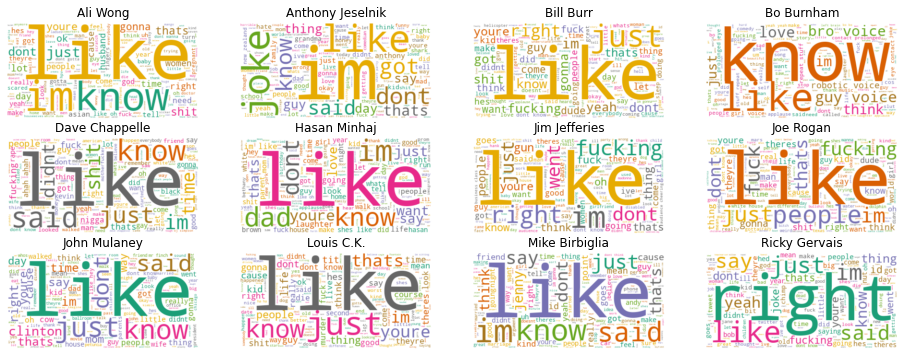

In [14]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]


# Create subplots for each comedian
for index, comedian in enumerate(data.index):
    wc.generate(data.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)
    
plt.show()

**Note:** They all have commen most used words, but most of these words are meaningles such as: im, like and just.\
to get better result we need to add these words to stop words and remove them.

In [16]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data_dtm.columns:
    top = [word for (word, count) in Top_words[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'hes',
 'tell',
 'yeah',
 'work',
 'theyre',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'said',
 'thats',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'time',
 'thing',
 'think',
 'yeah',
 'school',
 'did',
 'good',
 'jokes',
 'gonna',
 'baby',
 'ive',
 'okay',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'let',
 'theres',
 'doing',
 'voice',
 'know',
 'guy',
 'like',
 'bro',
 'love',
 'think',
 'im',
 'girl',
 'bo',
 'just',
 'stuff',
 'robotic',
 'repeat',
 'dont',
 'yeah',
 'laughter',
 '

In [17]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'time',
 'yeah',
 'said']

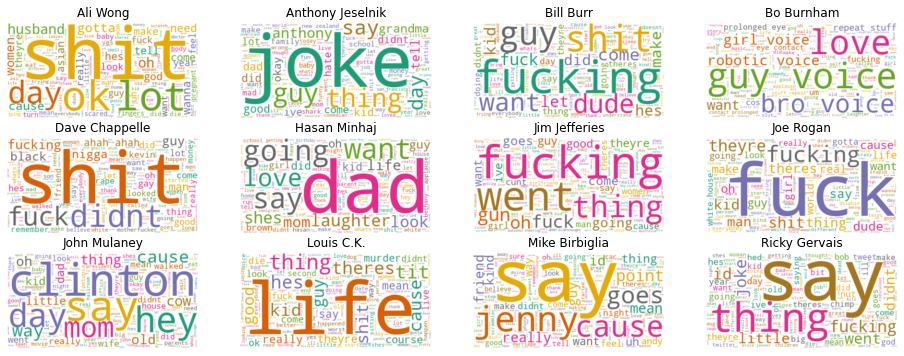

In [19]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]


# Create subplots for each comedian
for index, comedian in enumerate(data.index):
    wc.generate(data.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)
    
plt.show()

#### Number of Words

In [20]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data_dtm.columns:
    uniques = data_dtm[data_dtm[comedian] != 0].shape[0]
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data_dtm.columns, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,984
9,Louis C.K.,1098
3,Bo Burnham,1305
0,Ali Wong,1341
6,Jim Jefferies,1354
8,John Mulaney,1391
4,Dave Chappelle,1403
7,Joe Rogan,1469
10,Mike Birbiglia,1493
5,Hasan Minhaj,1601


In [21]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data_dtm.columns:
    totals = sum(data_dtm[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,984,2905,59,49.237288
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
3,Bo Burnham,1305,3633,60,60.550000
4,Dave Chappelle,1403,4094,67,61.104478
10,Mike Birbiglia,1493,4740,76,62.368421
11,Ricky Gervais,1633,4972,79,62.936709
6,Jim Jefferies,1354,4924,77,63.948052
8,John Mulaney,1391,4001,62,64.532258
5,Hasan Minhaj,1601,4958,73,67.917808


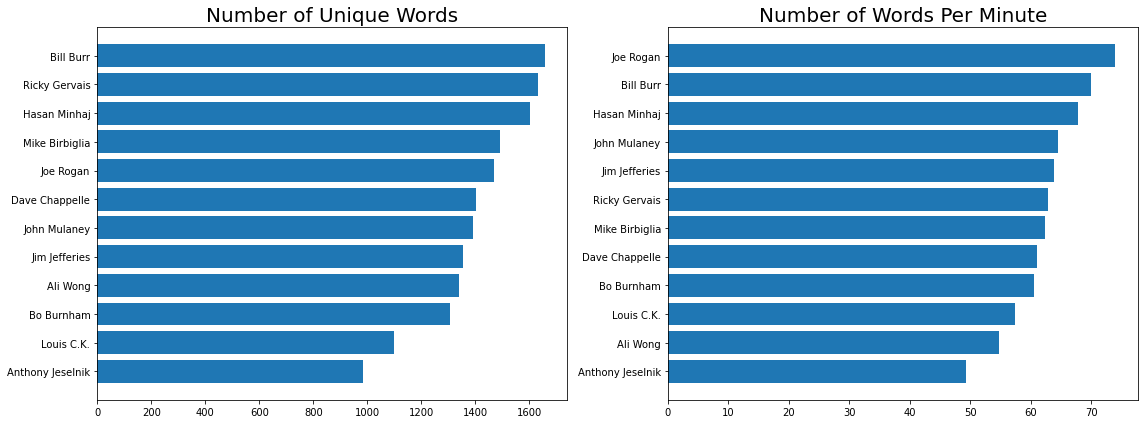

In [22]:
y_pos = range(data_words.shape[0])

plt.subplot(1, 2, 1)
plt.barh(data_unique_sort.comedian, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(data_unique_sort.comedian, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Sentiment Analysis

1. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

\
2. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. We will use this module (package) to analyse our data.


In [23]:
from textblob import TextBlob
data["polarity"] = data.transcript.apply(lambda x: TextBlob(x).sentiment.polarity)
data["subjectivity"] = data.transcript.apply(lambda x: TextBlob(x).sentiment.subjectivity)
data

,transcript,polarity,subjectivity
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,0.067153,0.481948
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...,0.047871,0.564326
Bill Burr,cheers and applause all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to b...,0.008104,0.544038
Bo Burnham,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...,0.068627,0.541035
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,-0.006692,0.516404
Hasan Minhaj,theme music orchestral hiphop crowd roars whats up davis whats up im home i had to bring it back here netflix said where do you want to do the spe...,0.076529,0.469720
Jim Jefferies,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...,0.038800,0.531879
Joe Rogan,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...,0.005678,0.555232
John Mulaney,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...,0.074385,0.491397
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...,0.050664,0.523300


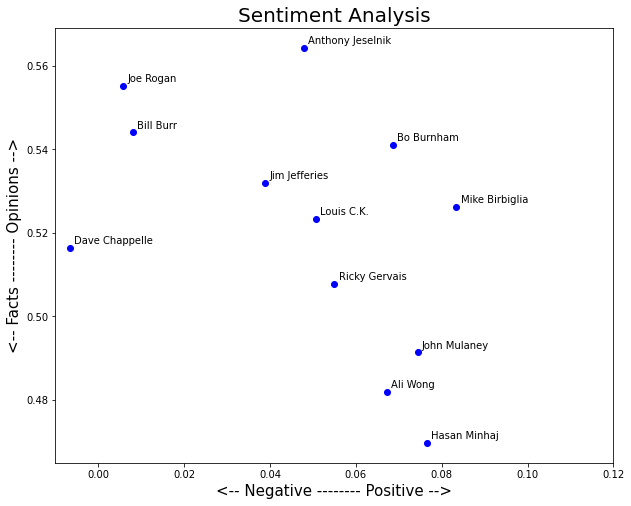

In [24]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data.index[i], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

by looking at this scatter plot we can see that the most postive and the closest to the fact is Hasan Minhaji

## conclusion

We have gone through this project together and saw the cleaning part, EDA part, and ML model part.

but this is not all there are several ml techniques that we did not look at, such as topic modeling.

Hopfully this was interesting to you as it was to me.

## sources
1. https://youtu.be/fLvJ8VdHLA0
2. https://youtu.be/xvqsFTUsOmc
3. https://github.com/adashofdata/nlp-in-python-tutorial